# 3부 선형 자료구조

데이터 요소가 순차적으로 배열 되는 자료구조를 선형(Linear) 자료구조라고 합니다.

선형 자료구조는 단일 레벨로 구성됩니다. 따라서 한번에 탐색이 가능하며, 구현하기도 쉽습니다.

배열, 스택, 큐, 연결리스트 등이 모두 선형 자료구조에 속합니다.

## 7장 배열

배열은 값 또는 변수 엘리먼트의 집합으로 구성된 구조로, 하나 이상의 인덱스 또는 키로 식별됩니다.

자료구조는 크게 메모리 공간 기반의 연속 (Contiguous) 방식과 포인터 기반의 연결 (Link) 방식으로 나뉩니다.

배열은 이중에서 연속 방식의 가장 기본이 되는 자료형입니다.

# 07. Two Sum

덧셈하여 타겟을 만들 수 있는 배열의 두 숫자 인덱스를 리턴하라.

In [62]:
# input
nums = [2, 7, 11, 15] # 조건을 설정할 때, 이어서 적으면 구문 오류가 남.
target = 9 # out =[0, 1]

# nums[0] + nums[1] = 2 + 7 = 9 따라서 0, 1 을 리턴한다.

### 1. 브루트 포스로 계산

#### 부르트 포스
배열을 2번 반복하면서 모든 조합을 더해서 일일이 확인해보는 무차별 대입 방식

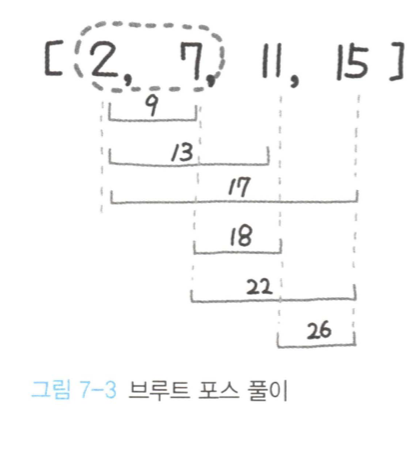

In [6]:
import time
start = time.time()  # 시작 시간 저장

def twoSum1(nums, target_):
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[i] + nums[j] == target_:
                return [i, j]

print(twoSum1(nums, target))

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0, 1]
time : 0.0005574226379394531


### 2. in을 이용한 탐색

모든 조합을 비교하지 않고 정답, 즉 타겟에서 첫 번째 값을 뺀 값 target - n이 존재하는 지 탐색하는 문제

In [65]:
start = time.time()  # 시작 시간 저장

def twoSum2(nums, target):
  for i, n in enumerate(nums):
    complement = target - n

    if complement in nums[i + 1:]:
      return [nums.index(n), nums[i + 1:].index(complement) + (i + 1)] # i + 1을 하는 이유? 앞에서 [i + 1:] 슬라이싱을 해서 날려버린 거 이후의 값을 더해준 것!

print(twoSum2(nums, target))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0, 1]
time : 0.0015726089477539062


In [66]:
list(enumerate(nums))

[(0, 2), (1, 7), (2, 11), (3, 15)]

### 3. 첫 번째 수를 뺀 결과 키 조회 (코드 이해 못 함ㅠ)

시간 복잡도를 개선해서 속도를 높여보자.

#### enumerate() 함수

- 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능

- 이 함수는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴합니다.

In [68]:
start = time.time()  # 시작 시간 저장

def twoSum3(nums, target):
  nums_map = {}
  # 키와 값을 바꿔서 딕셔너리로 저장
  for i, num in enumerate(nums):
    nums_map[num] = i

  # 타겟에서 첫 번째 수를 뺀 결과를 키로 조회
  for i, num in enumerate(nums):
    if target - num in nums_map and i != nums_map[target - num]:
      return [i, nums_map[target - num]]

print(twoSum3(nums, target))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0, 1]
time : 0.002417325973510742


### 4. 조회 구조 개선

딕셔너리 저장과 조회를 2개의 for 문으로 각각 처리했던 방식을 좀 더 개선해서 이번에는 하나의 for로 합쳐서 처리

In [13]:
start = time.time()

def twoSum4(nums, target):
  nums_map = {}
  for i, num in enumerate(nums):
    if target - num in nums_map:
      return [nums_map[target - num], i]
    nums_map[num] = i

print(twoSum4(nums, target))
print("time :", time.time() - start)

[0, 1]
time : 0.0017278194427490234


### 5. 투 포인터 이용 -> 이 문제는 입력값인 nums가 정렬된 상태가 아니어서, sort로 정렬을 할 경우 인덱스를 섞는 문제가 생겨서 풀이에 적합하지 못함!!

투 포인터란 왼쪽 포인터와 오른쪽 포인터의 합이 타겟보다 크다면 오른쪽 포인터를 왼쪽으로, 작다면 왼쪽 포인터와 오른쪽 포인터의 합이 타겟보다 크다면 오른쪽 포인터를 왼쪽으로, 작다면 왼쪽 포인터를 오른쪽으로 옮기면서 값을 조정하는 방식이다. 라고는 하는데 모르겠음..

In [15]:
start = time.time()

def twoSum5(nums, target):
    nums.sort()
    left, right = 0, len(nums) - 1
    while not left == right:
        # 합이 타겟보다 작으면 왼쪽 포인터를 오른쪽으로
        if nums[left] + nums[right] < target:
            left += 1
        # 합이 타겟보다 크면 오른쪽 포인터를 왼쪽으로
        elif nums[left] + nums[right] > target:
            right -= 1
        else:
            return [left, right]

print(twoSum5(nums, target))
print("time :", time.time() - start)

[0, 1]
time : 0.004599094390869141


# 08. 빗물 트래핑

높이를 입력받아 비가 내린 후 얼마나 많은 물이 쌓일 수 있는지 계산하라.

In [18]:
height = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1] # out = 6

### 1. 투 포인터를 최대로 이동

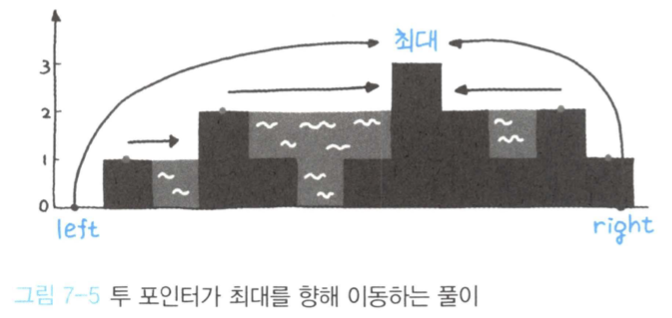

In [19]:
def trap1(height):
    if not height:
      return 0
    
    volume = 0
    left, right = 0, len(height) - 1
    left_max, right_max = height[left], height[right]
    
    while left < right:
        left_max, right_max = max(height[left], left_max), max(height[right], right_max)
    
        # 더 높은 쪽을 향해 투 포인터 이동
        if left_max <= right_max:
            volume += left_max - height[left]
            left += 1
        else:
            volume += right_max - height[right]
            right -= 1
    return volume

print(trap1(height))


6


### 2. 스택 쌓기

스택이란?
: 가장 나중에 넣은 데이터를 가장 먼저 뺄 수 있는 데이터 구조로 Last in First Out 혹은 First in Last Out 방식입니다.

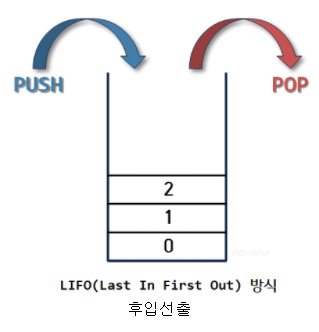

In [38]:
a_list = [1, 2, 3]
a_list.append(1) # 괄호 안의 요소를 리스트 맨 뒤에 넣음

In [39]:
print(a_list)

[1, 2, 3, 1]


In [40]:
a_list.pop() # 리스트의 맨 뒤에 요소를 꺼내고 리스트에서 삭제함
print(a_list)

[1, 2, 3]


In [41]:
a_list.pop()
print(a_list)

[1, 2]


In [50]:
# 클래스를 이용한 스택 구현

class stack:
  def __init__(self): # 스택 객체 생성
    self.items = []
  def push(self, item): # 스택 요소 추가 push(.append())
    self.items.append(item)
  def pop(self): # 스택 요소 삭제 pop()
    return self.items.pop()
  def peek(self): # 스택 맨 앞 요소 리턴
    return self[0]
  def isEmpty(self): # 스택이 비었는지 확인 (비었으면 True 리턴)
    return not self.items

stk = stack() # stack 객체 생성
print(stk) # stack object 생성 확인

In [51]:
print(stk.isEmpty()) # 처음에는 아무것도 들어있지 않으므로 True 출력

True


In [52]:
stk.push(1) # stk 에 1 넣음 : [1]
stk.push(2) # stk 에 2 넣음 : [1, 2]
print(stk.items)

[1, 2]


In [53]:
print(stk.pop()) # stk 에 2가 꺼내지면서 출력 : 2 / [1]

2


In [56]:
print(stk.peek()) # stk 맨 앞 값 출력 : 1 <- 왜 안되는 건지 모르겠음..

TypeError: ignored

In [57]:
print(stk.isEmpty()) # 비어 있지 않으므로 False 출력

False


In [58]:
print(stk.pop()) # stk 에 1가 꺼내지면서 출력 : 1 / []

1


In [59]:
print(stk.isEmpty()) # 객체에 아무것도 들어있지 않으므로 True 출력

True


In [60]:
def trap2(height):
    stack = []
    volume = 0
    
    for i in range(len(height)):
        # 변곡점을 만나는 경우
        while stack and height[i] > height[stack[-1]]:
            # 스택에서 꺼낸다
            top = stack.pop()
            if not len(stack): break
            
            # 이전과의 차이만큼 물 높이 처리
            distance = i - stack[-1] -1
            waters = min(height[i], height[stack[-1]]) - height[top]
            
            volume += distance * waters
        
        stack.append(i)
    return volume

print(trap2(height))

6


# 09. 세 수의 합

배열을 입력받아 합이 0을 만들 수 있는 3개의 엘리먼트를 출력하라.

In [22]:
# input
nums = [-1, 0, 1, 2, -1, -4]

### 1. 브루트 포스로 계산

In [23]:
def threeSum1(nums):
    result = []
    nums.sort()
    
    # 브루트 포스 n^3 반복
    for i in range(len(nums) - 2):
      # 중복된 값 건너뛰기
      if i > 0 and nums[i] == nums[i-1]:
        continue
      for j in range(i+1, len(nums)-1):
          if j > i+1 and nums[j] == nums[j-1]:
            continue
          for k in range(j+1, len(nums)):
              if k > j+1 and nums[k] == nums[k-1]:
                continue
              if nums[i] + nums[j] + nums[k] == 0:
                result.append([nums[i], nums[j], nums[k]])

    return result

print(threeSum1(nums))

[[-1, -1, 2], [-1, 0, 1]]


### 투 포인터로 합 계산

i를 축으로 하고 중복된 값을 건너 뛰게 한 부분은 다음과 같이 앞서 풀이와 동일하다.

In [24]:
def threeSum2(nums):
    result = []
    nums.sort()
    
    for i in range(len(nums) - 2):
      # 중복된 값 건너뛰기
      if i > 0 and nums[i] == nums[i-1]:
        continue 
      # 간격을 좁혀가며 합 sum 계산
      left, right = i+1, len(nums)-1
      while left < right:
          sum = nums[i] + nums[left] + nums[right]
          if sum < 0:
            left += 1
          elif sum > 0:
            right -= 1
          else:
            # sum = 0인 경우이므로 정답 및 스킵 처리
              result.append([nums[i], nums[left], nums[right]])
              
              while left < right and nums[left] == nums[left+1]:
                  left += 1
              while left < right and nums[right] == nums[right-1]: 
                  right -= 1
              left += 1
              right -= 1
    return result
            
print(threeSum2(nums))

[[-1, -1, 2], [-1, 0, 1]]


### 투 포인터

대개는 시작점과 끝점 또는 왼쪽 포인터와 오른쪽 포인터 두 지점을 기준으로 하는 문제 풀이 전략을 뜻한다.

범위를 좁혀 나가기 위해서는 일반적으로 배열이 정렬되어 있을 때 좀 더 유용하다.

앞서 풀이 했던 9번 '세 수의 합' 문제 또는 정렬된 배열을 이용하는 대표적인 투 포인터 풀이를 보여주는 무제다.

이 문제의 풀이에서는 기존 O(N^3)풀이를 투 포인터 기법을 적용해서 O(n^2)으로 풀이하는 획기적인 해법을 제시한 바가 있다.

투 포인터는 주로 정렬된 배열을 대상으로 하며, 2개의 포인터가 좌우로 자유롭게 움직이며 문제를 풀이한다. 이 떄문에 투 포인터라는 이름이 붙었다고 한다.

추후 슬라이딩 윈도우와 투 포인터의 공통점과 차이점에 대해 다시 한 번 자세히 살펴보겠습니다.

# 10. 배열 파티션 1

n개의 페어를 이용한 min(a, b)의 합으로 만들 수 있는 가장 큰 수를 출력하라.

In [25]:
# input
nums = [1, 4, 3, 2] # out = 4

# n은 2가 되며, 최대 합은 4이다.
# min(1, 2) + min(3, 4) = 4

### 1. 오름차순 풀이

페어의 min()을 합산 했을 때 최대를 만드는 것은 결국 min()이 되도록 커야한다는 뜻이고, 뒤에서부터 내림차순으로 집어넣으면 항상 최대 min() 페어를 유지 할 수 있다.


이 문제에서 배열 입력값은 항상 2n개일 것이므로 앞에서부터 오름차순으로 집어 넣어도 결과는 같을 것이다.

In [26]:
def arrayPairSum1(nums):
    sum = 0
    pair = []
    nums.sort()
    
    for n in nums:
        # 앞에서부터 오름차순으로 페어를 만들어 합 계산
        pair.append(n)
        if len(pair) == 2:
            sum += min(pair)
            pair = []
    return sum

print(arrayPairSum1(nums))

4


### 2. 짝수 번째 값 계산

페어에 대해 일일이 min()값을 구하지 않아도 짝수 번째 값(0부터 시작하므로)을 더하면 될 거 같다.

정렬된 상태에서는 짝수 번쨰에 항상 작은 값이 위치하기 떄문이다.

nums = [1, 4, 3, 2] -> nums.sort() = [1, 2, 3, 4]

In [28]:
def arrayPairSum2(nums):
  sum = 0
  nums.sort()

  for i, n in enumerate(nums):
    # 짝수 번째 값의 합 계산
    if i % 2 == 0:
      sum += n
  
  return sum

print(arrayPairSum2(nums))

4


### 3. 파이썬 다운 방식

In [30]:
def arrayPairSum3(nums):
  return sum(sorted(nums)[::2]) # 슬라이싱 구문 [::2]는 2칸씩 건너뛰므로 짝수 번째를 계산하는 것과 동일하게 풀 수 있다.

print(arrayPairSum3(nums))

4


# 11. 자신을 제외한 배열의 곱

배열을 입력받아 output[i]가 자신을 제외한 나머지 모든 요소의 곱셈 결과가 되도록 출력하라.

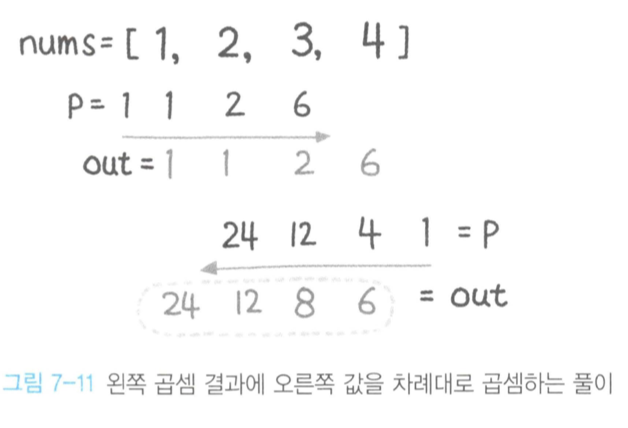

In [72]:
# input
nums = [1, 2, 3, 4] # out = [24, 12, 8, 6]

# 나눗셈을 사용하지 않고 O(n)에 풀이하라.

### 1. 왼쪽 곱셈 결과에 오른쪽 값을 차례대로 곱셈

In [73]:
def productExceptSelf(nums):
    out = []
    p = 1
    # 왼쪽 곱셈
    for i in range(0, len(nums)):
        out.append(p)
        p = p * nums[i]
    p = 1
    # 왼쪽 곱셈 결과와 오른쪽 값을 차례대로 곱셈
    for i in range(len(nums) - 1, 0 - 1, -1):
        out[i] = out[i] * p
        p = p * nums[i]
    return out

print(productExceptSelf(nums))

[24, 12, 8, 6]


# 12. 주식을 사고팔기 가장 좋은 시점

한 번의 거래로 낼 수 있는 최대 이익을 산출하라.

In [33]:
nums = [7, 1, 5, 3, 6, 4] # out = 5

# 1일 때 사서 6일 때 팔면 5의 이익을 얻는다.

### 1. 브루트 포스로 계산

In [36]:
def maxProfit1(nums):
    max_price = 0
    for i, price in enumerate(nums):
        for j in range(i, len(nums)):
            max_price = max(nums[j] - price, max_price)
    return  max_price

print(maxProfit1(nums))

5


### 2. 저점과 현재 값과의 차이 계산

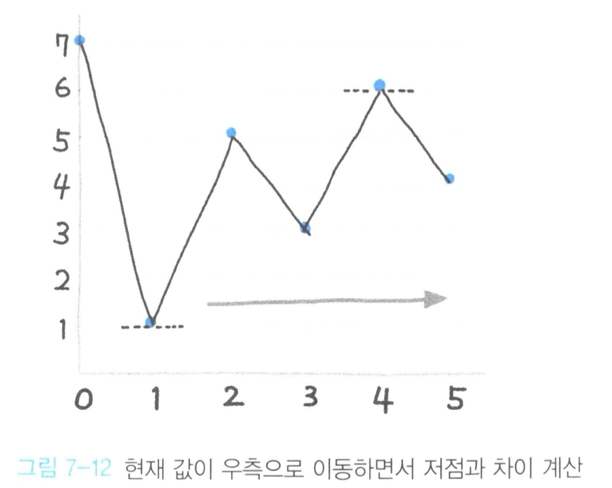

In [37]:
def maxProfit2(nums):
    profit = 0
    min_price = sys.maxsize # 시스템 최댓값
    
    # 최솟값, 최댓값 갱신
    for price in nums:
        min_price = min(min_price, price)
        profit = max(profit, price-min_price)
    return profit

print(maxProfit2(nums))

5
